## Deep Learning for Mental Health Classification  
## Group ID: sp25_DsoDusKan  
## Task Type: Supervised Learning — Multiclass Text Classification  
##  Modality: Text (Short-form Statements)  


In [ ]:
import kagglehub
import warnings
import torch
import joblib
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
import torch
from torch.utils.data import Dataset, DataLoader,random_split
from transformers import AutoTokenizer
import torch.nn as nn
import warnings
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader,random_split
from transformers import AutoTokenizer
import torch.nn as nn
import warnings
import torch.optim as optim


warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")

df = pd.read_csv(path + "/Combined Data.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [ ]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


<h2 align = "center"><strong>Cleaning & Preprocessing</strong></h2>

<h3>Removed unnecessary columns </h3>Unnamed: 0

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


<h3>Checked for missing values in the statement and status columns</h3>

In [ ]:
df.isnull().sum()

statement    362
status         0
dtype: int64

<h3>Dropped rows where statement was missing</h3>

In [ ]:
df = df.dropna(subset=["statement"]).reset_index(drop=True)

print(df.isnull().sum())

statement    0
status       0
dtype: int64


<h2 align = "center">Balancing the Dataset</h2>

In [ ]:
print(df["status"].value_counts())

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64


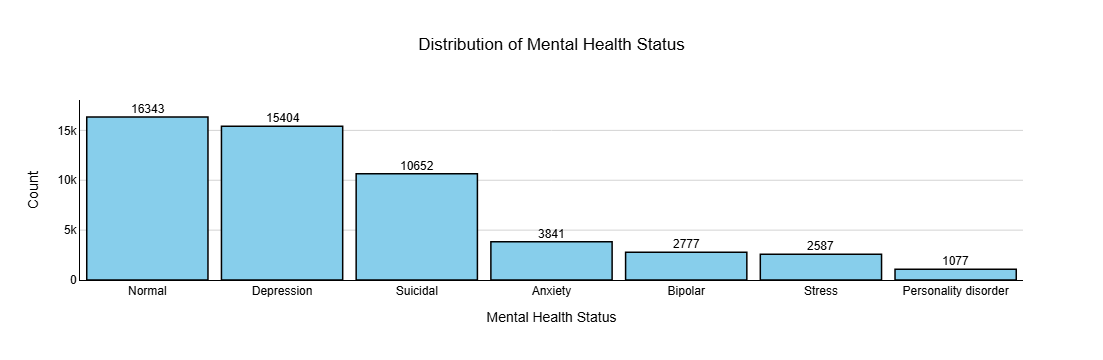

In [ ]:
status_counts = df["status"].value_counts().reset_index()
status_counts.columns = ["status", "count"]  # Rename columns for clarity

fig = px.histogram(status_counts, x="status", y="count", title='Distribution of Mental Health Status')

fig.update_layout(
    title_text='Distribution of Mental Health Status',
    title_x=0.5,
    xaxis_title="Mental Health Status",
    yaxis_title="Count",
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    bargap=0.1,  # Adjust gap as needed
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(
        showline=True,
        showgrid=False,
        linecolor="black",
        categoryorder='total descending' # Order by count descending
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        gridcolor="lightgray",
        linecolor="black"
    )
)

fig.update_traces(marker_color='skyblue',
                  marker_line_color='black',
                  marker_line_width=1.5)

# Add annotations (count labels on bars)
for i in range(len(status_counts)):
    fig.add_annotation(
        x=status_counts['status'][i],
        y=status_counts['count'][i],
        text=str(status_counts['count'][i]),
        showarrow=False,
        yanchor='bottom'
    )



fig.show()




In [ ]:
# Undersample the majority class ("Normal")
df_majority = df[df["status"] == "Normal"].sample(10000, random_state=30)

# Extract minority classes
df_minority = df[df["status"] != "Normal"]

# Oversample each minority class to match 10,000 samples
df_minority_balanced = df_minority.groupby("status").apply(lambda x: x.sample(10000, replace=True, random_state=33)).reset_index(drop=True)

# Combine undersampled majority and oversampled minority data
df_balanced = pd.concat([df_majority, df_minority_balanced])

# Checking new class distribution
print(df_balanced["status"].value_counts())

status
Normal                  10000
Anxiety                 10000
Bipolar                 10000
Depression              10000
Personality disorder    10000
Stress                  10000
Suicidal                10000
Name: count, dtype: int64


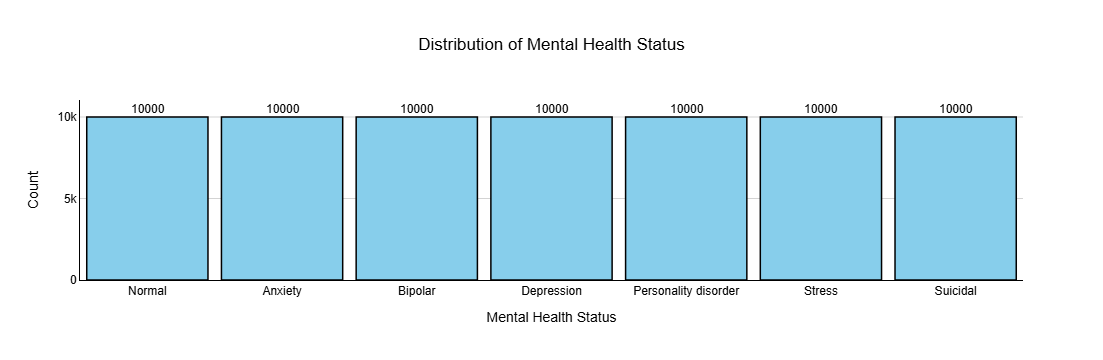

In [ ]:
status_counts = df_balanced["status"].value_counts().reset_index()
status_counts.columns = ["status", "count"]  # Rename columns for clarity

fig = px.histogram(status_counts, x="status", y="count", title='Distribution of Mental Health Status')

fig.update_layout(
    title_text='Distribution of Mental Health Status',
    title_x=0.5,
    xaxis_title="Mental Health Status",
    yaxis_title="Count",
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    bargap=0.1,  # Adjust gap as needed
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis=dict(
        showline=True,
        showgrid=False,
        linecolor="black",
        categoryorder='total descending' # Order by count descending
    ),
    yaxis=dict(
        showline=True,
        showgrid=True,
        gridcolor="lightgray",
        linecolor="black"
    )
)

fig.update_traces(marker_color='skyblue',
                  marker_line_color='black',
                  marker_line_width=1.5)

# Add annotations (count labels on bars)
for i in range(len(status_counts)):
    fig.add_annotation(
        x=status_counts['status'][i],
        y=status_counts['count'][i],
        text=str(status_counts['count'][i]),
        showarrow=False,
        yanchor='bottom'
    )



fig.show()

In [ ]:
label_encoder = LabelEncoder()
df_balanced['status'] = label_encoder.fit_transform(df_balanced['status'])

df_balanced.head()

,statement,status
43210,i m going to put myself out of this misery and...,3
33671,you mean the measures that will raise our taxes.,3
4572,what's wrong with my package abiez,3
43243,cardinaire ya me too,3
4487,Ni-ki is very bfable c.Ni-ki is tall.Ni-ki is ...,3


# Conversion To Tensors

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

class SentimentDataset(Dataset):
    def __init__(self, texts,labels,tokenizer,max_length = 128):
      self.texts = texts
      self.labels = labels
      self.tokenizer = tokenizer
      self.max_length = max_length

    def __len__(self):
      return len(self.texts)

    def __getitem__(self, idx):
      text = str(self.texts[idx])
      label = torch.tensor(self.labels[idx],dtype=torch.long)


      encoding = self.tokenizer.encode_plus(
          text,
          padding='max_length',
          truncation=True,
          max_length=self.max_length,
          return_tensors='pt'
      )

      return {
          'input_ids': encoding['input_ids'].squeeze(),
          'attention_mask': encoding['attention_mask'].squeeze(),
          'labels': label
      }

texts = df_balanced["statement"].tolist()
labels = df_balanced["status"].tolist()


dataset = SentimentDataset(texts, labels, tokenizer)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

batch = next(iter(dataloader))
print(batch)


{'input_ids': tensor([[  101, 28946,  1045,  ...,  2215,  2000,   102],
        [  101,  2155,  6550,  ...,     0,     0,     0],
        [  101, 13847,  2041,  ...,  2031,  3262,   102],
        ...,
        [  101, 20248,  5280,  ...,   999,   102,     0],
        [  101,  3311,  1998,  ...,  2026,  2160,   102],
        [  101,  1045,  5225,  ..., 24780,  2077,   102]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]]), 'labels': tensor([2, 4, 0, 3, 4, 1, 2, 1, 2, 5, 0, 5, 2, 6, 0, 2, 5, 6, 2, 4, 6, 1, 1, 3,
        3, 4, 5, 0, 6, 1, 4, 6])}


In [ ]:
torch.save(dataset, "/content/drive/MyDrive/ASDS5306/sentiment_dataset.pt")
torch.save(dataloader, "/content/drive/MyDrive/ASDS5306/sentiment_dataloader.pt")

joblib.dump(label_encoder, "/content/drive/MyDrive/ASDS5306/label_encoder.pkl")

print("Tensorized data saved in Google Drive!")

Tensorized data saved in Google Drive!


In [ ]:

class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = torch.tensor(self.labels[idx], dtype=torch.long)

        encoding = self.tokenizer.encode_plus(
            text,
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": label
        }

print("SentimentDataset class redefined.")


SentimentDataset class redefined.


In [ ]:
# Set seed for reproducibility
torch.manual_seed(30)

# Calculate sizes for 80% train and 20% test split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
print(f"Total dataset size: {len(dataset)}")
print(f"Train size: {train_size}, Test size: {test_size}")

# Split the dataset into train and test sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing
batch_size = 32  # Fixed batch size for consistency
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("Train and test DataLoaders created successfully!")

Total dataset size: 70000
Train size: 56000, Test size: 14000
Train and test DataLoaders created successfully!


# Shallow Network Analyses

In [ ]:
class ShallowNN(nn.Module):
  def __init__(self,input_dim,hidden_dim,output_dim):
    super(ShallowNN, self).__init__()
    self.layer1 = nn.Linear(input_dim, hidden_dim)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_dim, output_dim)

  def forward(self, x):
    x = self.layer1(x)
    x = self.relu(x)
    x = self.layer2(x)
    return x

# Setting Exact Dimensions
INPUT_DIM = 128  # Size of input_id Tensors
OUTPUT_DIM = 7    # Number of Classes

# Test the network with a sample hidden dimension
hidden_dim = 16  # Temporary value for testing; will be varied later
model = ShallowNN(INPUT_DIM, hidden_dim, OUTPUT_DIM)
print("Shallow neural network created successfully!")
print(f"Model architecture:\n{model}")

# Test with a sample input tensor
sample_input = torch.randn(1, INPUT_DIM)  # Random input tensor of shape [1, 128]
output = model(sample_input)
print(f"Sample output shape: {output.shape}")  # Should be [1, 7]



Shallow neural network created successfully!
Model architecture:
ShallowNN(
  (layer1): Linear(in_features=128, out_features=16, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=16, out_features=7, bias=True)
)
Sample output shape: torch.Size([1, 7])


In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

def train_model(model, train_loader, num_epochs=10, learning_rate=0.05):
    criterion = nn.CrossEntropyLoss()              # Loss function for multi-class classification
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # Stochastic Gradient Descent
    for epoch in range(num_epochs):
        model.train()                              # Set model to training mode
        total_loss = 0
        for batch in train_loader:
            input_ids = batch["input_ids"].float().to(device)  # Convert to float and send to GPU
            # Normalize input_ids to [0, 1]
            input_ids = input_ids / 30522.0
            labels = batch["labels"].to(device)               # Target labels (send to GPU)
            optimizer.zero_grad()                  # Clear previous gradients
            outputs = model(input_ids)             # Forward pass
            loss = criterion(outputs, labels)      # Compute loss
            loss.backward()                        # Backward pass (compute gradients)
            optimizer.step()                       # Update weights using gradient descent
            total_loss += loss.item()              # Accumulate loss
        avg_loss = total_loss / len(train_loader)  # Average loss per epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")
    return model


# Initialize the model with exact dimensions
hidden_dim = 16  # Fixed for this test run
model = ShallowNN(128, hidden_dim, 7).to(device)  # INPUT_DIM=128, OUTPUT_DIM=7

# Train the model with adjusted parameters
print("Starting training with normalized inputs...")
trained_model = train_model(model, train_loader, num_epochs=10, learning_rate=0.05)
print("Training completed!")

Using device: cuda
Starting training with normalized inputs...
Epoch 1/10, Average Loss: 1.8141
Epoch 2/10, Average Loss: 1.6902
Epoch 3/10, Average Loss: 1.6533
Epoch 4/10, Average Loss: 1.6381
Epoch 5/10, Average Loss: 1.6277
Epoch 6/10, Average Loss: 1.6196
Epoch 7/10, Average Loss: 1.6136
Epoch 8/10, Average Loss: 1.6084
Epoch 9/10, Average Loss: 1.6034
Epoch 10/10, Average Loss: 1.5992
Training completed!


In [ ]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

def test_model(model, test_loader):
    criterion = torch.nn.CrossEntropyLoss()
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].float().to(device)
            input_ids = input_ids / 30522.0
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(test_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)

    return avg_loss, accuracy, conf_matrix

# Run the test
print("Starting testing...")
test_loss, test_accuracy, test_conf_matrix = test_model(trained_model, test_loader)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Testing completed!")

Starting testing...
Test Loss: 1.6142
Test Accuracy: 0.3696
Confusion Matrix:
[[ 204  432  189  351  331  292  176]
 [ 165  915  204   54  301  263  140]
 [  78  186  315  233  365  360  424]
 [   6   44   15 1669   48   99  128]
 [  94  300  233  105  743  245  246]
 [  81  246  229   64  274  732  387]
 [  64  134  305  301  293  340  597]]
Testing completed!


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Training function
def train_model(model, train_loader, num_epochs=10, learning_rate=0.05):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            input_ids = batch["input_ids"].float().to(device)
            input_ids = input_ids / 30522.0
            labels = batch["labels"].to(device)
            optimizer.zero_grad()
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")
    return model

# ✅ Use best-performing hidden_dim from experiment
hidden_dim = 256
model = ShallowNN(128, hidden_dim, 7).to(device)

print("Starting training with normalized inputs...")
trained_model = train_model(model, train_loader, num_epochs=10, learning_rate=0.05)
print("Training completed!")

# Testing function
def test_model(model, test_loader):
    criterion = nn.CrossEntropyLoss()
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].float().to(device)
            input_ids = input_ids / 30522.0
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            probs = nn.functional.softmax(outputs, dim=1)
            all_probs.extend(probs.cpu().numpy())
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(test_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_)

    return avg_loss, accuracy, f1, conf_matrix, report

# Run the test
print("Starting testing...")
test_loss, test_accuracy, test_f1, test_conf_matrix, test_report = test_model(trained_model, test_loader)
print(f"✅ Test Loss: {test_loss:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Weighted F1 Score: {test_f1:.4f}")
print("\nClassification Report:\n", test_report)
print("Confusion Matrix:\n", test_conf_matrix)
print("Testing completed!")


Using device: cuda
Starting training with normalized inputs...
Epoch 1/10, Average Loss: 1.7654
Epoch 2/10, Average Loss: 1.6651
Epoch 3/10, Average Loss: 1.6386
Epoch 4/10, Average Loss: 1.6209
Epoch 5/10, Average Loss: 1.6059
Epoch 6/10, Average Loss: 1.5916
Epoch 7/10, Average Loss: 1.5765
Epoch 8/10, Average Loss: 1.5599
Epoch 9/10, Average Loss: 1.5409
Epoch 10/10, Average Loss: 1.5195
Training completed!
Starting testing...
✅ Test Loss: 1.5377
✅ Test Accuracy: 0.4143
✅ Weighted F1 Score: 0.3849

Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.38      0.15      0.22      1975
             Bipolar       0.49      0.53      0.51      2042
          Depression       0.28      0.08      0.12      1961
              Normal       0.61      0.82      0.70      2009
Personality disorder       0.40      0.58      0.47      1966
              Stress       0.34      0.37      0.36      2013
            Suicidal       0.27   

# Hyperparameter Experiment (varying hidden_dim (n))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

torch.manual_seed(30)
torch.cuda.manual_seed(30)


# Define hidden dimension values to test
hidden_dims = [2, 4, 8, 16, 32, 64, 128, 256]
test_losses = []
test_accuracies = []
confusion_matrices = []

# Iterate over different hidden layer sizes
for n in hidden_dims:
    print(f"\nTraining with hidden layer size: {n}")

    # Initialize a new model with the current hidden dimension
    model = ShallowNN(128, n, 7).to(device)  # INPUT_DIM=128, OUTPUT_DIM=7

    # Train the model
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.05)
    for epoch in range(10):  # 10 epochs
        model.train()
        total_loss = 0
        for batch in train_loader:
            input_ids = batch["input_ids"].float().to(device) / 30522.0  # Normalize and move to device
            labels = batch["labels"].to(device)  # Move to device
            optimizer.zero_grad()
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch {epoch+1}/10, Average Loss: {avg_loss:.4f}")

    # Test the trained model
    model.eval()
    total_test_loss = 0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].float().to(device) / 30522.0  # Normalize and move to device
            labels = batch["labels"].to(device)  # Move to device
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_test_loss += loss.item()
            _, preds = torch.max(outputs, dim=1)  # Get predicted class
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Compute metrics
    avg_test_loss = total_test_loss / len(test_loader)
    test_accuracy = accuracy_score(all_labels, all_preds)
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Store results
    test_losses.append(avg_test_loss)
    test_accuracies.append(test_accuracy)
    confusion_matrices.append(conf_matrix.tolist())  # Convert to list for DataFrame storage

    print(f"Test Loss for n={n}: {avg_test_loss:.4f}")
    print(f"Test Accuracy for n={n}: {test_accuracy:.4f}")
    print(f"Confusion Matrix for n={n}:\n{conf_matrix}")

print("\nHyperparameter experiment completed!")

# Store results in DataFrame
results_df = pd.DataFrame({
    "hidden_dim": hidden_dims,
    "test_loss": test_losses,
    "test_accuracy": test_accuracies,
    "confusion_matrix": confusion_matrices
})

# Print DataFrame
print("\nResults Summary:")
print(results_df[["hidden_dim", "test_loss", "test_accuracy"]])

Using device: cuda

Training with hidden layer size: 2
Epoch 1/10, Average Loss: 1.8634
Epoch 2/10, Average Loss: 1.7400
Epoch 3/10, Average Loss: 1.7317
Epoch 4/10, Average Loss: 1.7293
Epoch 5/10, Average Loss: 1.7282
Epoch 6/10, Average Loss: 1.7277
Epoch 7/10, Average Loss: 1.7275
Epoch 8/10, Average Loss: 1.7273
Epoch 9/10, Average Loss: 1.7271
Epoch 10/10, Average Loss: 1.7269
Test Loss for n=2: 1.7317
Test Accuracy for n=2: 0.2779
Confusion Matrix for n=2:
[[ 587  734    0  383   10  141  120]
 [ 517 1231    0   60   20  119   95]
 [ 842  464    0  309   18  112  216]
 [ 146   58    0 1662   14   15  114]
 [ 877  621    0  135    6  153  174]
 [ 951  531    0   96   13  117  305]
 [ 850  357    0  415   21  104  287]]

Training with hidden layer size: 4
Epoch 1/10, Average Loss: 1.8060
Epoch 2/10, Average Loss: 1.7172
Epoch 3/10, Average Loss: 1.6924
Epoch 4/10, Average Loss: 1.6771
Epoch 5/10, Average Loss: 1.6706
Epoch 6/10, Average Loss: 1.6665
Epoch 7/10, Average Loss: 1.663

# Training and Evaluating best peforming Shallow network

In [ ]:
def test_model(model, test_loader):
    from sklearn.metrics import roc_auc_score, roc_curve
    from sklearn.preprocessing import label_binarize
    import matplotlib.pyplot as plt

    criterion = nn.CrossEntropyLoss()
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].float().to(device)
            input_ids = input_ids / 30522.0
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            probs = nn.functional.softmax(outputs, dim=1)  # 🔸 Get probabilities
            _, preds = torch.max(probs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())  # 🔸 Save probabilities

    # Convert lists to arrays
    all_probs = np.array(all_probs)
    all_labels = np.array(all_labels)

    # Metrics
    avg_loss = total_loss / len(test_loader)
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    conf_matrix = confusion_matrix(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=label_encoder.classes_)

    # AUC + ROC
    n_classes = all_probs.shape[1]
    binary_labels = label_binarize(all_labels, classes=range(n_classes))
    auc_score = roc_auc_score(binary_labels, all_probs, average='weighted', multi_class='ovr')
    print(f"✅ Weighted AUC Score: {auc_score:.4f}")

    fpr = dict()
    tpr = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(binary_labels[:, i], all_probs[:, i])
        plt.plot(fpr[i], tpr[i], label=f"Class {i}: {label_encoder.classes_[i]}")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multi-class ROC Curve")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    return avg_loss, accuracy, f1, conf_matrix, report


✅ Weighted AUC Score: 0.7709


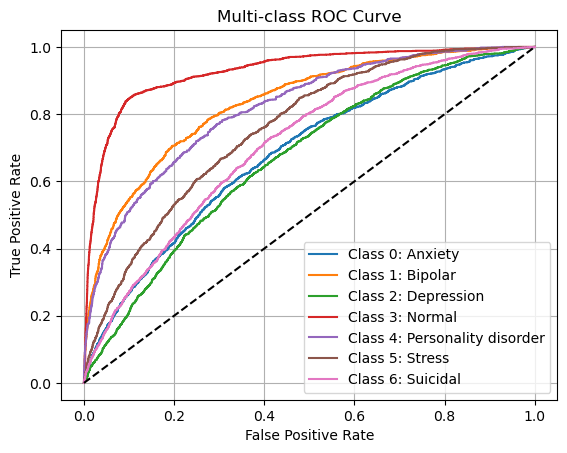

In [ ]:
test_loss, test_accuracy, test_f1, test_conf_matrix, test_report = test_model(trained_model, test_loader)


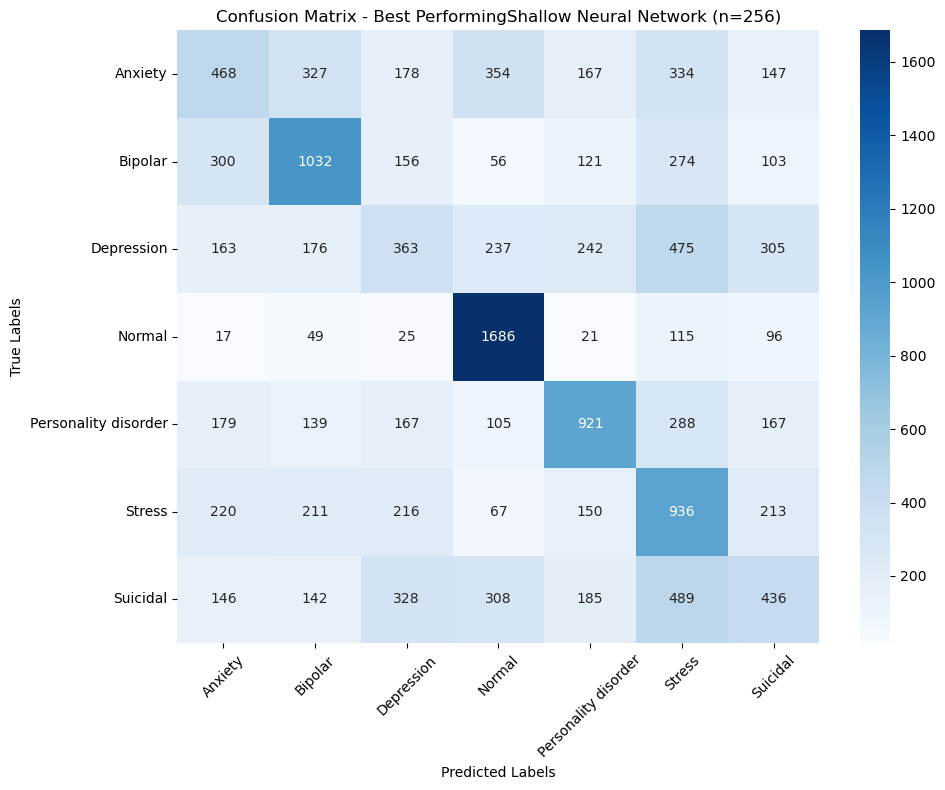

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set class names (from your label encoder)
class_names = label_encoder.classes_

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Best PerformingShallow Neural Network (n=256)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



Optimal hidden dimension (n): 256 with Minimum Test Loss: 1.5383


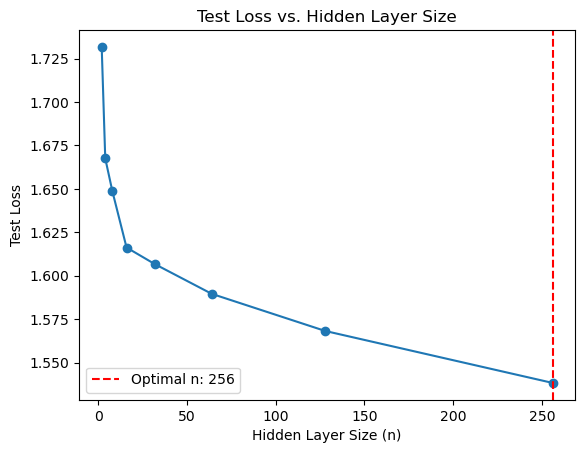

In [ ]:

# Find the optimal n (minimum test loss) and its corresponding loss
optimal_n = results_df.loc[results_df["test_loss"].idxmin(), "hidden_dim"]
min_test_loss = results_df["test_loss"].min()

# Print the optimal n and min test loss
print(f"\nOptimal hidden dimension (n): {optimal_n} with Minimum Test Loss: {min_test_loss:.4f}")

# Plot test loss vs. hidden layer size
plt.plot(results_df["hidden_dim"], results_df["test_loss"], marker="o", linestyle="-")
plt.xlabel("Hidden Layer Size (n)")
plt.ylabel("Test Loss")
plt.title("Test Loss vs. Hidden Layer Size")
plt.axvline(optimal_n, color="red", linestyle="--", label=f"Optimal n: {optimal_n}")
plt.legend()
plt.show()


# Deep Network Analyses

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Split into 80% train, 20% test
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders with GPU optimization
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,
                         num_workers=4, pin_memory=True)
print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")
print("Train and test DataLoaders created successfully!")

Train size: 56000, Test size: 14000
Train and test DataLoaders created successfully!


In [ ]:
import torch.nn as nn

# Define the deep neural network class
class DeepNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(DeepNN, self).__init__()
        layers = []

        # Input layer: from input_dim to hidden_dim
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())

        # Hidden layers: num_layers - 1 additional layers of hidden_dim
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())

        # Output layer: from hidden_dim to output_dim
        layers.append(nn.Linear(hidden_dim, output_dim))


        # Combine all layers into a sequential model
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Set the exact dimensions
INPUT_DIM = 128  # Size of input_ids tensor
OUTPUT_DIM = 7   # Number of sentiment classes

# Test the network with sample parameters
d = 2  # Number of hidden layers (temporary for testing)
p = 16  # Neurons per hidden layer (temporary for testing)
model = DeepNN(INPUT_DIM, p, OUTPUT_DIM, d)
print("Deep neural network created successfully!")
print(f"Model architecture with d={d}, p={p}:\n{model}")

# Test with a sample input tensor
sample_input = torch.randn(1, INPUT_DIM) # Random input tensor of shape [1, 128]
output = model(sample_input)
print(f"Sample output shape: {output.shape}")  # Should be [1, 7]

Deep neural network created successfully!
Model architecture with d=2, p=16:
DeepNN(
  (network): Sequential(
    (0): Linear(in_features=128, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=7, bias=True)
  )
)
Sample output shape: torch.Size([1, 7])


In [ ]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
import time

# Hyperparameter Expirement by varying d and p

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seeds
torch.manual_seed(30)
torch.cuda.manual_seed(30)

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Define training function
def train_model(model, train_loader, num_epochs=10, learning_rate=0.05):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    train_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch in train_loader:
            input_ids = batch["input_ids"].float().to(device) / 30522.0  # Normalize and move to device
            labels = batch["labels"].to(device)
            optimizer.zero_grad()
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            # Compute accuracy
            _, preds = torch.max(outputs, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        avg_loss = total_loss / len(train_loader)
        epoch_accuracy = correct / total
        train_accuracies.append(epoch_accuracy)
        print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}")

    # Return average train accuracy over epochs
    return model, np.mean(train_accuracies)

# Define testing function
def test_model(model, test_loader):
    criterion = nn.CrossEntropyLoss()
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []  # For ROC curve

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].float().to(device) / 30522.0
            labels = batch["labels"].to(device)
            outputs = model(input_ids)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Get predictions and probabilities
            _, preds = torch.max(outputs, dim=1)
            probs = torch.softmax(outputs, dim=1)  # Probabilities for ROC
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())

    avg_loss = total_loss / len(test_loader)
    accuracy = accuracy_score(all_labels, all_preds)

    # Classification report for F1, precision, recall
    report = classification_report(all_labels, all_preds, output_dict=True)
    f1 = report["weighted avg"]["f1-score"]
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]

    # Confusion matrix
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # AUC-ROC (one-vs-rest for multi-class)
    all_probs = np.array(all_probs)
    all_labels_bin = np.zeros((len(all_labels), 7))  # Binarize labels for 7 classes
    for i, label in enumerate(all_labels):
        all_labels_bin[i, label] = 1
    auc_scores = []
    for i in range(7):
        auc = roc_auc_score(all_labels_bin[:, i], all_probs[:, i])
        auc_scores.append(auc)
    avg_auc = np.mean(auc_scores)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    for i in range(7):
        fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_scores[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (One-vs-Rest)")
    plt.legend(loc="best")
    plt.savefig(f"roc_curve_d{d}_p{p}.png")
    plt.close()

    return {
        "test_loss": avg_loss,
        "test_accuracy": accuracy,
        "f1_score": f1,
        "precision": precision,
        "recall": recall,
        "auc": avg_auc,
        "confusion_matrix": conf_matrix.tolist()  # Convert to list for storage
    }

# Define hyperparameter experiment
depths = [1, 2, 3, 4]
widths = [16, 32, 64, 128]
results = {}

# Run experiment
for d in depths:
    for p in widths:
        print(f"\nTraining DeepNN with d={d}, p={p}")
        model = DeepNN(128, p, 7, d).to(device)  # Move to device
        trained_model, train_accuracy = train_model(model, train_loader, num_epochs=10, learning_rate=0.05)
        metrics = test_model(trained_model, test_loader)
        results[(d, p)] = {
            "train_accuracy": train_accuracy,
            **metrics
        }
        print(f"Test Loss for d={d}, p={p}: {metrics['test_loss']:.4f}")
        print(f"Train Accuracy: {train_accuracy:.4f}")
        print(f"Test Accuracy: {metrics['test_accuracy']:.4f}")
        print(f"F1-Score: {metrics['f1_score']:.4f}")
        print(f"Precision: {metrics['precision']:.4f}")
        print(f"Recall: {metrics['recall']:.4f}")
        print(f"Average AUC: {metrics['auc']:.4f}")
        print(f"Confusion Matrix:\n{np.array(metrics['confusion_matrix'])}")

# Find smallest d and p that outperform shallow network
best_d, best_p = min(
    [(d, p) for (d, p), res in results.items() if res["test_loss"] < best_shallow_loss],
    key=lambda x: (x[0], x[1]), default=(None, None)
)

print(f"\nSmallest d and p beating shallow network (loss < {best_shallow_loss}):")
if best_d is not None:
    print(f"d={best_d}, p={best_p}, Test Loss: {results[(best_d, best_p)]['test_loss']:.4f}")
else:
    print("No configuration outperformed the shallow network.")

# Store results in DataFrame
results_df = pd.DataFrame([
    {
        "depth": d,
        "width": p,
        "train_accuracy": res["train_accuracy"],
        "test_loss": res["test_loss"],
        "test_accuracy": res["test_accuracy"],
        "f1_score": res["f1_score"],
        "precision": res["precision"],
        "recall": res["recall"],
        "auc": res["auc"],
        "confusion_matrix": res["confusion_matrix"]
    }
    for (d, p), res in results.items()
])
print("\nResults Summary:")
print(results_df.drop(columns=["confusion_matrix"]))  # Exclude matrix for readability

Using device: cuda

Training DeepNN with d=1, p=16
Epoch 1/10, Average Loss: 1.7821, Train Accuracy: 0.2778
Epoch 2/10, Average Loss: 1.6857, Train Accuracy: 0.3248
Epoch 3/10, Average Loss: 1.6614, Train Accuracy: 0.3391
Epoch 4/10, Average Loss: 1.6435, Train Accuracy: 0.3480
Epoch 5/10, Average Loss: 1.6291, Train Accuracy: 0.3574
Epoch 6/10, Average Loss: 1.6195, Train Accuracy: 0.3629
Epoch 7/10, Average Loss: 1.6125, Train Accuracy: 0.3658
Epoch 8/10, Average Loss: 1.6064, Train Accuracy: 0.3704
Epoch 9/10, Average Loss: 1.6009, Train Accuracy: 0.3729
Epoch 10/10, Average Loss: 1.5949, Train Accuracy: 0.3760
Test Loss for d=1, p=16: 1.6117
Train Accuracy: 0.3495
Test Accuracy: 0.3735
F1-Score: 0.3517
Precision: 0.3519
Recall: 0.3735
Average AUC: 0.7390
Confusion Matrix:
[[ 251  367  163  359  375  269  191]
 [ 208  856  172   55  337  252  162]
 [  94  169  265  234  384  329  486]
 [  14   39   26 1674   52   89  115]
 [  90  244  145  105  859  234  289]
 [  90  242  159   75  

# Evaluatiion of Best configuration

Best Performing Configuration: d=3, p=128
Average AUC: 0.8174
Train Accuracy: 0.3706
Test Accuracy: 0.4704
Test Loss: 1.3850
F1-Score: 0.4292
Precision: 0.4438
Recall: 0.4704
Confusion Matrix:
[[ 423  293  126  337  414  285   97]
 [ 273 1224   42   59  224  184   36]
 [ 129  126  258  220  603  422  203]
 [  10   46   11 1668   97   92   85]
 [  14   12   10   74 1779   45   32]
 [ 157  145  177   47  449  916  122]
 [ 109  109  235  287  541  435  318]]


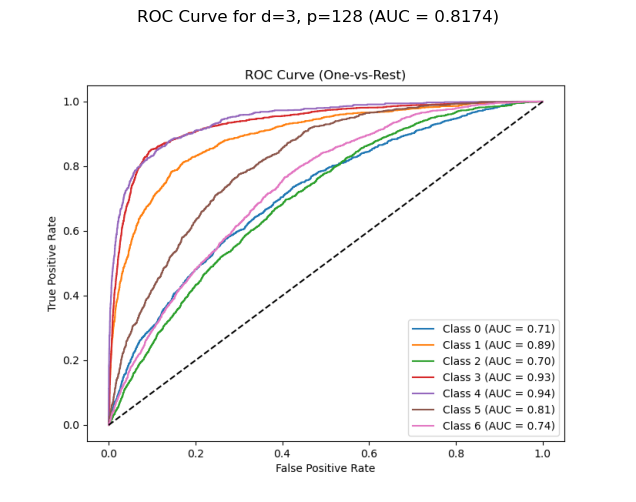

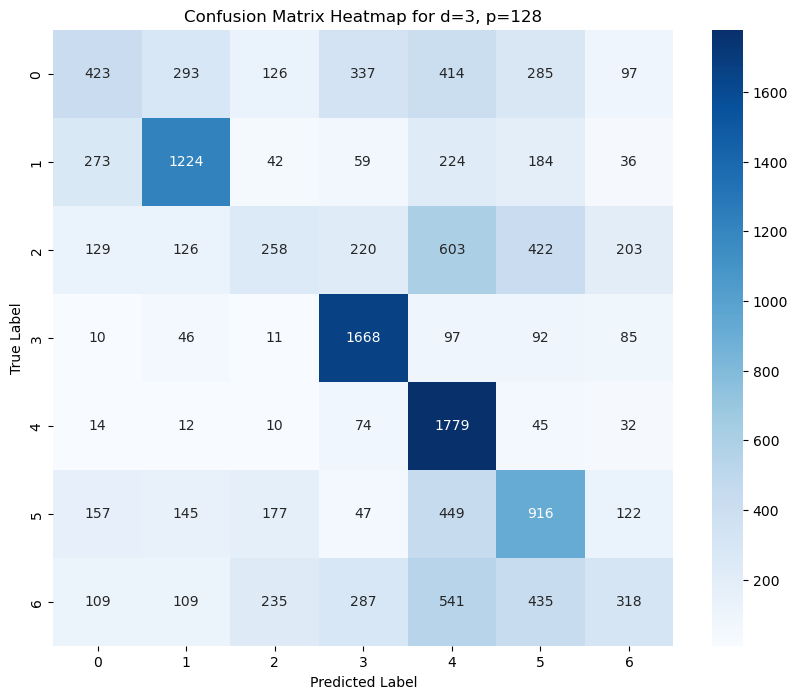

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Find the best performing configuration based on AUC
best_idx = results_df["auc"].idxmax()
best_row = results_df.iloc[best_idx]
best_d = int(best_row["depth"])  # Ensure integer for filename
best_p = int(best_row["width"])  # Ensure integer for filename
best_auc = best_row["auc"]
best_conf_matrix = np.array(best_row["confusion_matrix"])  # Convert list to numpy array

# Print metrics for the best configuration
print(f"Best Performing Configuration: d={best_d}, p={best_p}")
print(f"Average AUC: {best_auc:.4f}")
print(f"Train Accuracy: {best_row['train_accuracy']:.4f}")
print(f"Test Accuracy: {best_row['test_accuracy']:.4f}")
print(f"Test Loss: {best_row['test_loss']:.4f}")
print(f"F1-Score: {best_row['f1_score']:.4f}")
print(f"Precision: {best_row['precision']:.4f}")
print(f"Recall: {best_row['recall']:.4f}")
print(f"Confusion Matrix:\n{best_conf_matrix}")

# Display ROC curve
roc_image_path = f"roc_curve_d{best_d}_p{best_p}.png"
try:
    img = Image.open(roc_image_path)
    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"ROC Curve for d={best_d}, p={best_p} (AUC = {best_auc:.4f})")
    plt.show()
except FileNotFoundError:
    print(f"ROC curve image not found at {roc_image_path}")

# Generate confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    best_conf_matrix,
    annot=True,  # Show counts
    fmt="d",  # Integer format
    cmap="Blues",  # Color scheme
    xticklabels=range(7),  # Class indices (replace with class_names if available)
    yticklabels=range(7)
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix Heatmap for d={best_d}, p={best_p}")
plt.show()

# Optimization Techniques

In [ ]:
import torch.nn as nn

# Define the deep neural network class
class DeepNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers):
        super(DeepNN, self).__init__()
        layers = []

        # Input layer: from input_dim to hidden_dim
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())

        # Hidden layers: num_layers - 1 additional layers of hidden_dim
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())

        # Output layer: from hidden_dim to output_dim
        layers.append(nn.Linear(hidden_dim, output_dim))


        # Combine all layers into a sequential model
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

# Set the exact dimensions
INPUT_DIM = 128  # Size of input_ids tensor
OUTPUT_DIM = 7   # Number of sentiment classes

# Test the network with sample parameters
d = 3  # Number of hidden layers (temporary for testing)
p = 128  # Neurons per hidden layer (temporary for testing)
model = DeepNN(INPUT_DIM, p, OUTPUT_DIM, d)
print("Deep neural network created successfully!")
print(f"Model architecture with d={d}, p={p}:\n{model}")

# Test with a sample input tensor
sample_input = torch.randn(1, INPUT_DIM) # Random input tensor of shape [1, 128]
output = model(sample_input)
print(f"Sample output shape: {output.shape}")  # Should be [1, 7]

Deep neural network created successfully!
Model architecture with d=3, p=128:
DeepNN(
  (network): Sequential(
    (0): Linear(in_features=128, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=7, bias=True)
  )
)
Sample output shape: torch.Size([1, 7])


In [ ]:
import time

In [ ]:
class Trainer:
    def __init__(self, model, train_dataset, test_loader, optimizer_fn, batch_size, device, lr=0.05, momentum=0.0):
        self.device = device
        self.model = model.to(device)
        self.criterion = nn.CrossEntropyLoss()
        self.batch_size = batch_size
        self.train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        self.test_loader = test_loader
        if momentum > 0:
            self.optimizer = optimizer_fn(self.model.parameters(), lr=lr, momentum=momentum)
        else:
            self.optimizer = optimizer_fn(self.model.parameters(), lr=lr)

    def train(self, num_epochs=10):
        self.model.train()
        start = time.time()
        for epoch in range(num_epochs):
            total_loss = 0
            for batch in self.train_loader:
                input_ids = batch["input_ids"].float().to(self.device) / 30522.0
                labels = batch["labels"].to(self.device)

                self.optimizer.zero_grad()
                outputs = self.model(input_ids)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                total_loss += loss.item()
            avg_loss = total_loss / len(self.train_loader)
            print(f"Epoch {epoch+1}/{num_epochs} - Avg Loss: {avg_loss:.4f}")
        duration = time.time() - start
        print(f"Training completed in {duration:.2f} seconds.")
        return duration

    def evaluate(self):
        self.model.eval()
        correct, total, total_loss = 0, 0, 0
        with torch.no_grad():
            for batch in self.test_loader:
                input_ids = batch["input_ids"].float().to(self.device) / 30522.0
                labels = batch["labels"].to(self.device)
                outputs = self.model(input_ids)
                loss = self.criterion(outputs, labels)
                total_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        accuracy = correct / total
        avg_loss = total_loss / len(self.test_loader)
        return accuracy, avg_loss


#### Gradient Descent (GD) – Full Batch Training

In [ ]:
# Create full-batch DataLoader size
full_batch_size = len(train_dataset)

# Define model
model_gd = DeepNN(INPUT_DIM, 128, OUTPUT_DIM, 3)

# Create Trainer instance using full batch and standard SGD
trainer_gd = Trainer(model=model_gd,
                     train_dataset=train_dataset,
                     test_loader=test_loader,
                     optimizer_fn=optim.SGD,
                     batch_size=full_batch_size,
                     device=device,
                     lr=0.05)

# Train and evaluate
gd_time = trainer_gd.train(num_epochs=10)
gd_acc, gd_loss = trainer_gd.evaluate()
print(f"GD Test Accuracy: {gd_acc:.4f}, GD Test Loss: {gd_loss:.4f}")


Epoch 1/10 - Avg Loss: 1.9471
Epoch 2/10 - Avg Loss: 1.9470
Epoch 3/10 - Avg Loss: 1.9470
Epoch 4/10 - Avg Loss: 1.9470
Epoch 5/10 - Avg Loss: 1.9469
Epoch 6/10 - Avg Loss: 1.9469
Epoch 7/10 - Avg Loss: 1.9468
Epoch 8/10 - Avg Loss: 1.9468
Epoch 9/10 - Avg Loss: 1.9468
Epoch 10/10 - Avg Loss: 1.9467
Training completed in 260.65 seconds.
GD Test Accuracy: 0.1439, GD Test Loss: 1.9474


#### Stochastic Gradient Descent (SGD) – Varying Batch Sizes

In [ ]:
batch_sizes = [len(train_dataset)//(2**i) for i in range(0, 5)]  # Full, 1/2, 1/4, 1/8, 1/16

sgd_results = []

for bs in batch_sizes:
    print(f"\n--- Training with SGD, batch size: {bs} ---")

    model_sgd = DeepNN(INPUT_DIM, 128, OUTPUT_DIM, 3)  # Same architecture for fair comparison

    trainer = Trainer(model=model_sgd,
                      train_dataset=train_dataset,
                      test_loader=test_loader,
                      optimizer_fn=optim.SGD,
                      batch_size=bs,
                      device=device,
                      lr=0.05)

    sgd_time = trainer.train(num_epochs=10)
    sgd_acc, sgd_loss = trainer.evaluate()

    sgd_results.append({
        "Batch Size": bs,
        "Train Time (s)": round(sgd_time, 2),
        "Test Accuracy": round(sgd_acc, 4),
        "Test Loss": round(sgd_loss, 4)
    })

# Display results as DataFrame
import pandas as pd
sgd_df = pd.DataFrame(sgd_results)
sgd_df



--- Training with SGD, batch size: 56000 ---
Epoch 1/10 - Avg Loss: 1.9469
Epoch 2/10 - Avg Loss: 1.9469
Epoch 3/10 - Avg Loss: 1.9469
Epoch 4/10 - Avg Loss: 1.9468
Epoch 5/10 - Avg Loss: 1.9468
Epoch 6/10 - Avg Loss: 1.9468
Epoch 7/10 - Avg Loss: 1.9468
Epoch 8/10 - Avg Loss: 1.9467
Epoch 9/10 - Avg Loss: 1.9467
Epoch 10/10 - Avg Loss: 1.9467
Training completed in 256.90 seconds.

--- Training with SGD, batch size: 28000 ---
Epoch 1/10 - Avg Loss: 1.9470
Epoch 2/10 - Avg Loss: 1.9469
Epoch 3/10 - Avg Loss: 1.9468
Epoch 4/10 - Avg Loss: 1.9468
Epoch 5/10 - Avg Loss: 1.9467
Epoch 6/10 - Avg Loss: 1.9467
Epoch 7/10 - Avg Loss: 1.9466
Epoch 8/10 - Avg Loss: 1.9466
Epoch 9/10 - Avg Loss: 1.9465
Epoch 10/10 - Avg Loss: 1.9464
Training completed in 258.61 seconds.

--- Training with SGD, batch size: 14000 ---
Epoch 1/10 - Avg Loss: 1.9476
Epoch 2/10 - Avg Loss: 1.9475
Epoch 3/10 - Avg Loss: 1.9473
Epoch 4/10 - Avg Loss: 1.9471
Epoch 5/10 - Avg Loss: 1.9470
Epoch 6/10 - Avg Loss: 1.9468
Epoc

,Batch Size,Train Time (s),Test Accuracy,Test Loss
0,56000,256.90,0.1438,1.9467
1,28000,258.61,0.1287,1.9464
2,14000,258.67,0.1264,1.9467
3,7000,263.49,0.1441,1.9457
4,3500,287.33,0.1390,1.9438


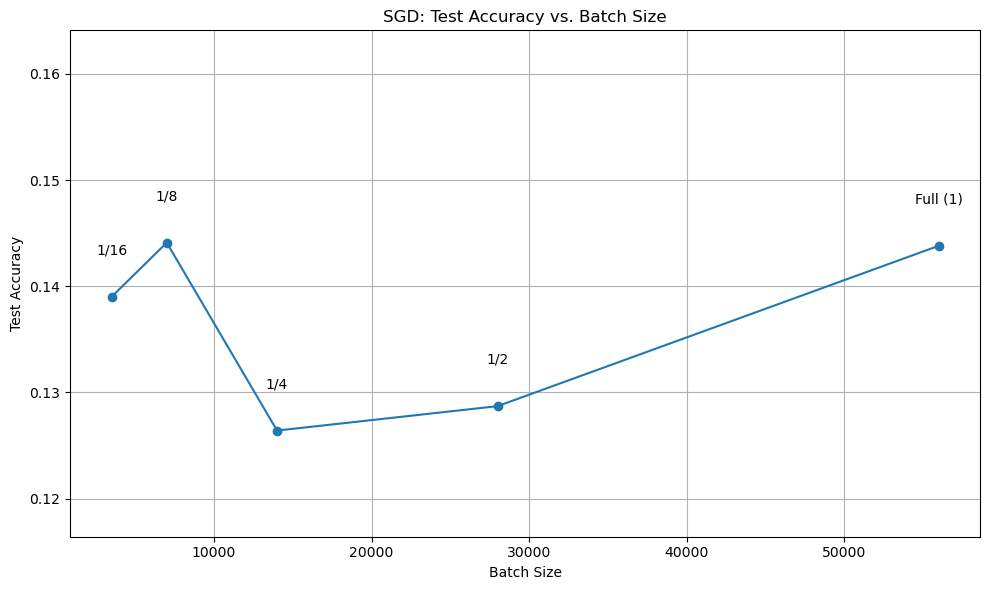

In [ ]:
sgd_df['Label'] = ['Full (1)', '1/2', '1/4', '1/8', '1/16']

# Step 3: Plot Accuracy vs. Batch Size
plt.figure(figsize=(10, 6))
plt.plot(sgd_df['Batch Size'], sgd_df['Test Accuracy'], marker='o', linestyle='-')

# Step 4: Add annotations for each point
for i in range(len(sgd_df)):
    plt.annotate(sgd_df['Label'][i],
                 (sgd_df['Batch Size'][i], sgd_df['Test Accuracy'][i] + 0.004),
                 ha='center')

# 🛠 Fix: Set y-axis limits with some headroom
plt.ylim(min(sgd_df['Test Accuracy']) - 0.01, max(sgd_df['Test Accuracy']) + 0.02)

plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("SGD: Test Accuracy vs. Batch Size")
plt.grid(True)
plt.tight_layout()
plt.show()


#### SGD with Momentum – Varying Batch Sizes

In [ ]:
momentum_results = []

for bs in batch_sizes:
    print(f"\n--- Training with SGD + Momentum, batch size: {bs} ---")

    model_momentum = DeepNN(INPUT_DIM, 128, OUTPUT_DIM, 2)

    trainer = Trainer(model=model_momentum,
                      train_dataset=train_dataset,
                      test_loader=test_loader,
                      optimizer_fn=optim.SGD,
                      batch_size=bs,
                      device=device,
                      lr=0.05,
                      momentum=0.9)

    train_time = trainer.train(num_epochs=10)
    acc, loss = trainer.evaluate()

    momentum_results.append({
        "Batch Size": bs,
        "Train Time (s)": round(train_time, 2),
        "Test Accuracy": round(acc, 4),
        "Test Loss": round(loss, 4)
    })

# View results as DataFrame
momentum_df = pd.DataFrame(momentum_results)
momentum_df



--- Training with SGD + Momentum, batch size: 56000 ---
Epoch 1/10 - Avg Loss: 1.9469
Epoch 2/10 - Avg Loss: 1.9468
Epoch 3/10 - Avg Loss: 1.9466
Epoch 4/10 - Avg Loss: 1.9464
Epoch 5/10 - Avg Loss: 1.9460
Epoch 6/10 - Avg Loss: 1.9456
Epoch 7/10 - Avg Loss: 1.9452
Epoch 8/10 - Avg Loss: 1.9447
Epoch 9/10 - Avg Loss: 1.9442
Epoch 10/10 - Avg Loss: 1.9437
Training completed in 294.38 seconds.

--- Training with SGD + Momentum, batch size: 28000 ---
Epoch 1/10 - Avg Loss: 1.9484
Epoch 2/10 - Avg Loss: 1.9482
Epoch 3/10 - Avg Loss: 1.9478
Epoch 4/10 - Avg Loss: 1.9473
Epoch 5/10 - Avg Loss: 1.9467
Epoch 6/10 - Avg Loss: 1.9460
Epoch 7/10 - Avg Loss: 1.9454
Epoch 8/10 - Avg Loss: 1.9446
Epoch 9/10 - Avg Loss: 1.9439
Epoch 10/10 - Avg Loss: 1.9432
Training completed in 313.72 seconds.

--- Training with SGD + Momentum, batch size: 14000 ---
Epoch 1/10 - Avg Loss: 1.9471
Epoch 2/10 - Avg Loss: 1.9463
Epoch 3/10 - Avg Loss: 1.9451
Epoch 4/10 - Avg Loss: 1.9439
Epoch 5/10 - Avg Loss: 1.9427
E

,Batch Size,Train Time (s),Test Accuracy,Test Loss
0,56000,294.38,0.1438,1.9435
1,28000,313.72,0.1481,1.9426
2,14000,315.38,0.2734,1.9324
3,7000,315.71,0.2709,1.7989
4,3500,318.35,0.3117,1.7199


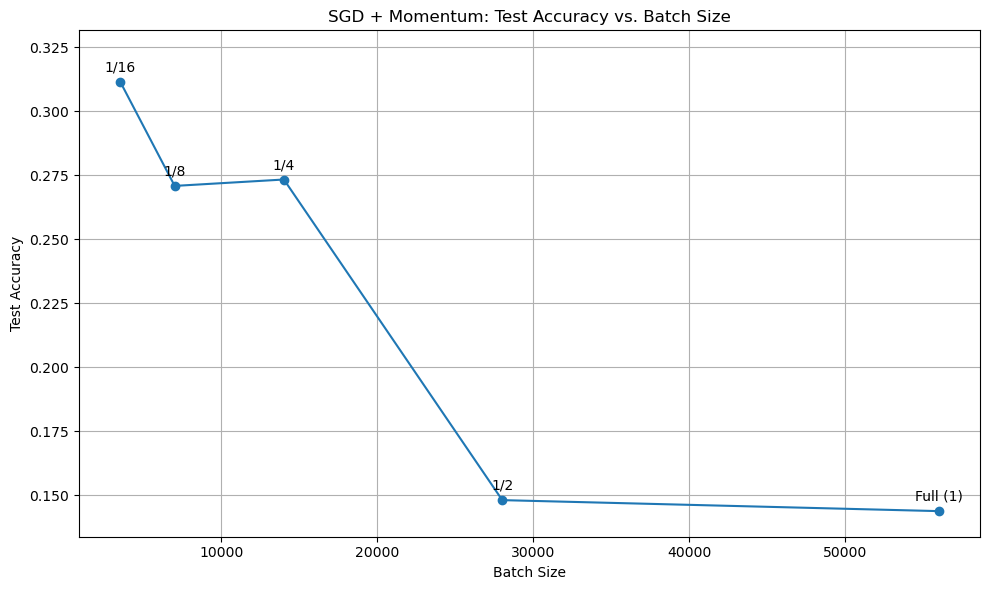

In [ ]:
momentum_df['Label'] = ['Full (1)', '1/2', '1/4', '1/8', '1/16']

# Step 3: Plot Accuracy vs. Batch Size
plt.figure(figsize=(10, 6))
plt.plot(momentum_df['Batch Size'], momentum_df['Test Accuracy'], marker='o', linestyle='-')

# Step 4: Annotate each point
for i in range(len(momentum_df)):
    plt.annotate(momentum_df['Label'][i],
                 (momentum_df['Batch Size'][i], momentum_df['Test Accuracy'][i] + 0.004),
                 ha='center')

# Step 5: Adjust y-limits to avoid label cutoffs
plt.ylim(min(momentum_df['Test Accuracy']) - 0.01, max(momentum_df['Test Accuracy']) + 0.02)

plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("SGD + Momentum: Test Accuracy vs. Batch Size")
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Takeaways:**


- GD performed the worst in all metrics and had the highest training time.
- Smaller batch sizes improved both loss and accuracy for SGD.
- Momentum had the largest positive impact, especially at batch size 3500.
- The combination of momentum and mini-batch updates provided the best training efficiency and generalization.


**Conclusion:**

SGD with Momentum using a batch size of 3500 delivered the best results in terms of accuracy, training time, and test loss. Gradient Descent (full batch) was the least effective approach. This project demonstrated the strong benefits of using momentum and tuning batch size to optimize performance.


# Advanced Techniques

## BERT (Bidirectional Encoder Representations from Transformers)

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [ ]:
from datasets import Dataset

# Rename columns to HuggingFace-friendly names
df_hf = df_balanced[["statement", "status"]].rename(columns={"statement": "text", "status": "label"})
hf_dataset = Dataset.from_pandas(df_hf)

In [ ]:
# Check GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_fn(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

# Tokenize entire dataset
tokenized_dataset = hf_dataset.map(tokenize_fn, batched=True)


Map:   0%|          | 0/70000 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_dataset)

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 70000
})


In [ ]:
# Step 1: Prepare Dataset for HuggingFace
from datasets import Dataset
from transformers import BertTokenizer
from sklearn.preprocessing import LabelEncoder


# Step 3: Split into train/test
tokenized_dataset = tokenized_dataset.train_test_split(test_size=0.2, seed=42)

# Step 4: Load BERT model
from transformers import BertForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, f1_score

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=7)

# Step 5: Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted"),
    }

# Step 6: Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    logging_dir="./logs"
)


# Step 7: Create Trainer and train
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

# Step 8: Evaluate
results = trainer.evaluate()
print(results)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
500,0.874500
1000,0.530500
1500,0.459700
2000,0.399000
2500,0.356300
3000,0.333400
3500,0.307000
4000,0.205000
4500,0.207700
5000,0.199700


{'eval_loss': 0.29415905475616455, 'eval_accuracy': 0.9450714285714286, 'eval_f1': 0.9447449121537456, 'eval_runtime': 35.3054, 'eval_samples_per_second': 396.54, 'eval_steps_per_second': 24.784, 'epoch': 4.0}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
predictions = trainer.predict(tokenized_dataset["test"])
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# Print report
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
print(confusion_matrix(y_true, y_pred))


                      precision    recall  f1-score   support

             Anxiety       0.98      0.99      0.98      1983
             Bipolar       0.99      0.99      0.99      2037
          Depression       0.86      0.83      0.84      1970
              Normal       0.98      0.95      0.96      1980
Personality disorder       0.99      1.00      1.00      1983
              Stress       0.95      0.99      0.97      2007
            Suicidal       0.87      0.86      0.86      2040

            accuracy                           0.95     14000
           macro avg       0.94      0.95      0.94     14000
        weighted avg       0.94      0.95      0.94     14000

[[1954    2    8    3    3   12    1]
 [   4 2024    1    0    1    7    0]
 [  11   18 1639   16    9   22  255]
 [   9    1   17 1882    1   52   18]
 [   0    0    0    0 1983    0    0]
 [   4    1    2    6    1 1993    0]
 [   6    4  249   16    1    8 1756]]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Get predictions on training set
train_preds = trainer.predict(train_dataset)
y_true = train_preds.label_ids
y_pred = train_preds.predictions.argmax(axis=1)

# Calculate metrics
train_accuracy = accuracy_score(y_true, y_pred)
train_f1 = f1_score(y_true, y_pred, average="weighted")

print(f"✅ Training Accuracy: {train_accuracy:.4f}")
print(f"✅ Training F1 Score: {train_f1:.4f}")


✅ Training Accuracy: 0.9865
✅ Training F1 Score: 0.9865


Classification Report:
                      precision    recall  f1-score   support

             Anxiety       0.98      0.99      0.98      1983
             Bipolar       0.99      0.99      0.99      2037
          Depression       0.86      0.83      0.84      1970
              Normal       0.98      0.95      0.96      1980
Personality disorder       0.99      1.00      1.00      1983
              Stress       0.95      0.99      0.97      2007
            Suicidal       0.87      0.86      0.86      2040

            accuracy                           0.95     14000
           macro avg       0.94      0.95      0.94     14000
        weighted avg       0.94      0.95      0.94     14000

Confusion Matrix:
[[1954    2    8    3    3   12    1]
 [   4 2024    1    0    1    7    0]
 [  11   18 1639   16    9   22  255]
 [   9    1   17 1882    1   52   18]
 [   0    0    0    0 1983    0    0]
 [   4    1    2    6    1 1993    0]
 [   6    4  249   16    1    8 1756]]


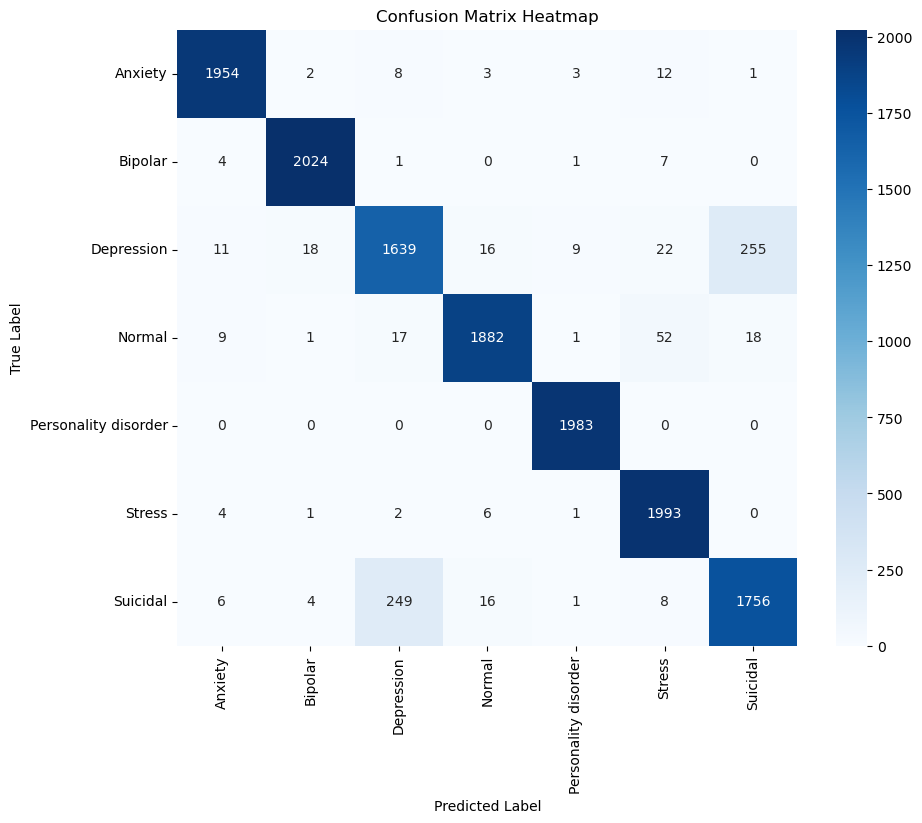

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define metrics (already in your code, included for completeness)
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="weighted"),
    }

# Get predictions
predictions = trainer.predict(tokenized_dataset["test"])
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Compute and print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust size for readability
sns.heatmap(
    conf_matrix,
    annot=True,  # Show counts in cells
    fmt="d",  # Integer format for counts
    cmap="Blues",  # Color scheme
    xticklabels=label_encoder.classes_,  # Predicted labels
    yticklabels=label_encoder.classes_,  # True labels
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

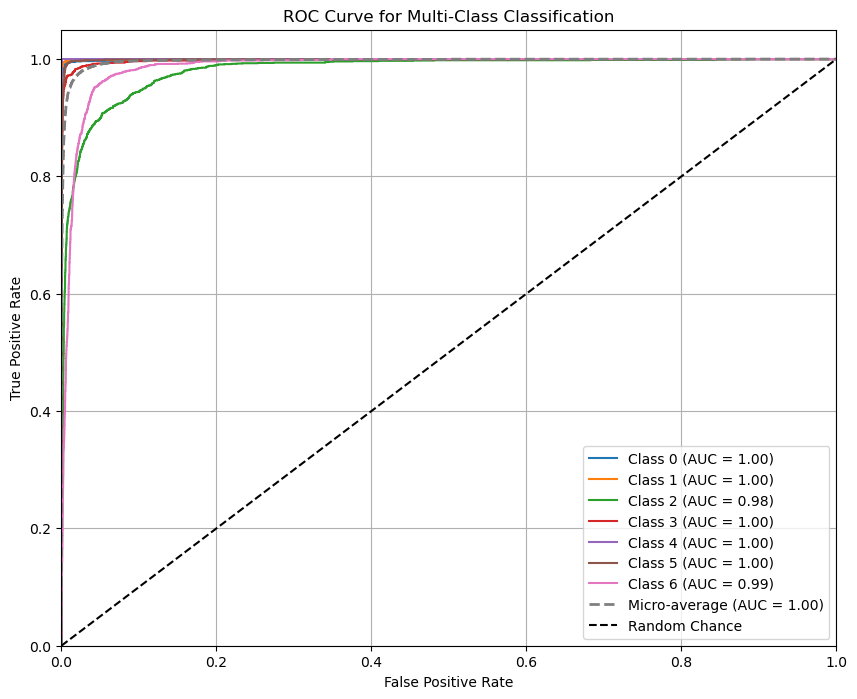

AUC Scores:
Class 0: 1.00
Class 1: 1.00
Class 2: 0.98
Class 3: 1.00
Class 4: 1.00
Class 5: 1.00
Class 6: 0.99
Micro-average AUC: 1.00


In [ ]:
import numpy as np
from scipy.special import softmax
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Get predictions from the test dataset
predictions = trainer.predict(tokenized_dataset["test"])
logits = predictions.predictions  # Raw logits
labels = predictions.label_ids   # True labels

# Step 2: Convert logits to probabilities
probs = softmax(logits, axis=1)  # Apply softmax to get probabilities

# Step 3: Initialize lists to store ROC data
fpr = {}  # False Positive Rate
tpr = {}  # True Positive Rate
roc_auc = {}  # AUC scores
n_classes = 7  # Number of classes

# Step 4: Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(labels == i, probs[:, i])  # One-vs-Rest for class i
    roc_auc[i] = roc_auc_score(labels == i, probs[:, i])

# Step 5: Compute micro-averaged ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(np.eye(n_classes)[labels].ravel(), probs.ravel())
roc_auc["micro"] = roc_auc_score(np.eye(n_classes)[labels], probs, average="micro")

# Step 6: Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot(fpr["micro"], tpr["micro"], label=f"Micro-average (AUC = {roc_auc['micro']:.2f})", linestyle="--", linewidth=2)

plt.plot([0, 1], [0, 1], "k--", label="Random Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print AUC scores
print("AUC Scores:")
for i in range(n_classes):
    print(f"Class {i}: {roc_auc[i]:.2f}")
print(f"Micro-average AUC: {roc_auc['micro']:.2f}")

## CNN Model

Using device: cuda
🔧 Training CNN model...
Epoch 1/10, Avg Loss: 1.8352
Epoch 2/10, Avg Loss: 1.7901
Epoch 3/10, Avg Loss: 1.7794
Epoch 4/10, Avg Loss: 1.7766
Epoch 5/10, Avg Loss: 1.7687
Epoch 6/10, Avg Loss: 1.7636
Epoch 7/10, Avg Loss: 1.7589
Epoch 8/10, Avg Loss: 1.7540
Epoch 9/10, Avg Loss: 1.7558
Epoch 10/10, Avg Loss: 1.7523

🧪 Evaluating CNN model...
✅ Accuracy: 0.3278
✅ Weighted F1 Score: 0.2895

Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.07      0.10      1975
           1       0.39      0.59      0.47      2042
           2       0.31      0.25      0.28      1961
           3       0.39      0.78      0.52      2009
           4       0.27      0.31      0.28      1966
           5       0.27      0.20      0.23      2013
           6       0.24      0.10      0.14      2034

    accuracy                           0.33     14000
   macro avg       0.29      0.33      0.29     14000
weighted avg       0.29   

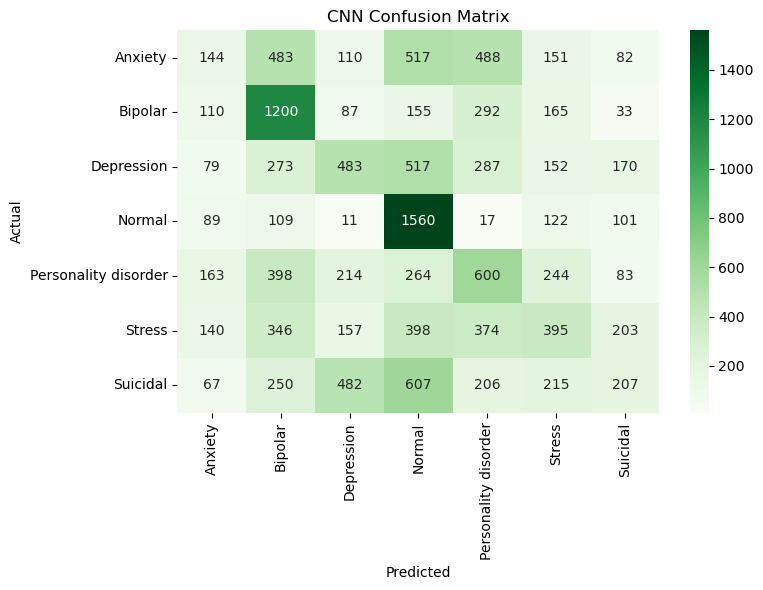

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# CNN Classifier
class CNNClassifier(nn.Module):
    def __init__(self, input_dim=128, num_classes=7, num_filters=100, filter_sizes=[3, 4, 5]):
        super(CNNClassifier, self).__init__()
        self.convs = nn.ModuleList([
            nn.Conv2d(1, num_filters, (fs, input_dim)) for fs in filter_sizes
        ])
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(num_filters * len(filter_sizes), num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # [batch, 1, seq_len, embed_dim]
        conved = [F.relu(conv(x)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(c, c.shape[2]).squeeze(2) for c in conved]
        cat = torch.cat(pooled, dim=1)
        cat = self.dropout(cat)
        return self.fc(cat)

# Train function
def train_model(model, train_loader, num_epochs=10, lr=0.05):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            input_ids = batch["input_ids"].float().to(device) / 30522.0
            input_ids = input_ids.unsqueeze(-1).repeat(1, 1, 128)  # fake embedding
            optimizer.zero_grad()
            outputs = model(input_ids)
            loss = criterion(outputs, batch["labels"].to(device))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Avg Loss: {total_loss / len(train_loader):.4f}")
    return model

# Eval function
def evaluate_model(model, test_loader):
    model.to(device)
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].float().to(device) / 30522.0
            input_ids = input_ids.unsqueeze(-1).repeat(1, 1, 128)
            outputs = model(input_ids)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch["labels"].cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average="weighted")
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ Weighted F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds))

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("CNN Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Run it
model = CNNClassifier().to(device)
print("🔧 Training CNN model...")
trained_cnn = train_model(model, train_loader)
print("\n🧪 Evaluating CNN model...")
evaluate_model(trained_cnn, test_loader)


# Conclusion

- BERT outperformed CNN significantly (94.5% vs. 32.8% accuracy).
- Balancing the dataset improved model fairness across classes.
- SGD with Momentum and tuned batch size (3,500) was the most effective optimizer.


**Future Work:** Explore hybrid models or fine-tune CNN architecture for better performance.